# Part 4 - Régression logistique

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split

from modelstats import LogReg

GitHub de mon module modelstats: https://github.com/nicodesh/ModelStats

## Import du dataset

In [2]:
with open('data/part3.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

length  margin_up  margin_low  height_left  height_right  diagonal  \
0  112.83       2.89        4.52       104.86        104.95    171.81   
1  113.29       2.87        4.01       103.74        103.70    171.67   
2  113.84       2.88        4.40       103.76        103.76    171.83   
3  113.63       3.12        3.73       103.78        103.65    171.80   
4  113.55       2.27        5.04       103.70        103.75    172.05   
5  113.16       2.99        4.54       104.65        104.44    172.57   
6  113.30       2.90        3.97       103.55        103.80    172.38   
7  113.38       3.19        3.54       103.65        103.37    171.58   
8  113.53       3.33        4.06       103.51        103.75    171.96   
9  112.47       3.02        4.63       104.34        104.20    172.14   

   is_genuine        f1        f2        f3  
0           1  2.153639  1.599709  1.787451  
1           1 -2.110416 -0.526039  0.542563  
2           1 -1.973152 -0.048102  0.858716  
3           1 -2.059795 -0.089105 -0.531529  
4           1 -2.403180  0.412170  3.319507  
5           1  1.235656  2.983191  0.953054  
6           1 -2.079412  1.147980  0.171245  
7           1 -2.623934 -1.040133 -1.069093  
8           1 -1.736309 -0.227631 -1.146803  
9           1  0.727490  1.063881  0.704949

## Régression logistique simple, avec "length"

In [3]:
lr1_data = df[['length', 'is_genuine']].copy()
lr1 = LogReg(lr1_data, threshold=0.5, the_class=0.5)

## Nuage de points, probabilités par classe, régression logistique

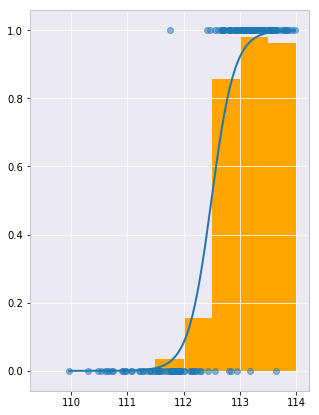

In [4]:
lr1.plot()

## Tableau des paramètres et matrice de confusion

In [5]:
lr1.infos()

2 parameters (including the intercept)


Coeff             OR       P-Value
B1 -549.076637  3.459763e-239  3.141864e-10
B2    4.881051   1.317691e+02  3.015435e-10

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     97      6    103
Predict 0      3     64     67
Total        100     70    170


Success rate: 94.71%
Sensibility: 97.00%
Specificity: 91.43%


## Courbe ROC (Received Operating Characteristic)

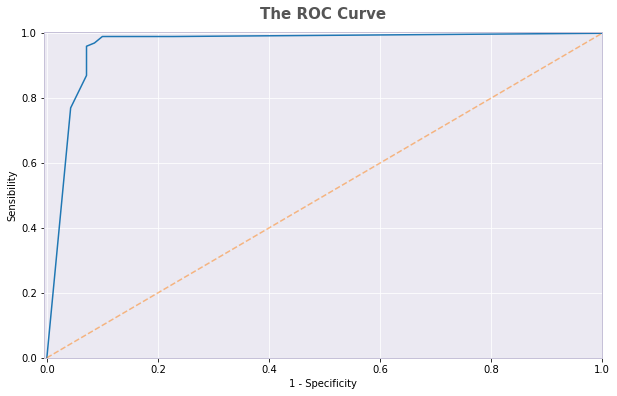

In [6]:
lr1.roc()

## Régression logistique multiple #1

length, margin_low, height_right, diagonal

In [7]:
lr2_data = df[['length', 'margin_low', 'height_right', 'diagonal', 'is_genuine']]
lr2 = LogReg(lr2_data, threshold=0.5)

### Tableau des paramètres et matrice de confusion

In [8]:
lr2.infos()

5 parameters (including the intercept)


Coeff            OR   P-Value
B1 -1563.889046  0.000000e+00  0.294141
B2    10.021861  2.251329e+04  0.039804
B3   -14.772631  3.839972e-07  0.043982
B4     0.293714  1.341400e+00  0.939905
B5     2.754021  1.570566e+01  0.642631

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     99      1    100
Predict 0      1     69     70
Total        100     70    170


Success rate: 98.82%
Sensibility: 99.00%
Specificity: 98.57%


## Régression logistique multiple #2

length, margin_low, diagonal

In [9]:
lr3_data = df[['length', 'margin_low', 'diagonal', 'is_genuine']]
lr3 = LogReg(lr3_data, threshold=0.5)

### Tableau des paramètres et matrice de confusion

In [10]:
lr3.infos()

4 parameters (including the intercept)


Coeff            OR   P-Value
B1 -1524.242260  0.000000e+00  0.274768
B2     9.938302  2.070855e+04  0.035405
B3   -14.593403  4.593732e-07  0.032937
B4     2.751284  1.566273e+01  0.643583

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     98      1     99
Predict 0      2     69     71
Total        100     70    170


Success rate: 98.24%
Sensibility: 98.00%
Specificity: 98.57%


## Régression logistique multiple #3

length, margin_low

In [11]:
lr4_data = df[['length', 'margin_low', 'is_genuine']]
lr4 = LogReg(lr4_data, threshold=0.5)

### Tableau des paramètres et matrice de confusion

In [12]:
lr4.infos()

3 parameters (including the intercept)


Coeff           OR   P-Value
B1 -944.418955     0.000000  0.012353
B2    8.942012  7646.564179  0.011816
B3  -13.365894     0.000002  0.011898

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     99      1    100
Predict 0      1     69     70
Total        100     70    170


Success rate: 98.82%
Sensibility: 99.00%
Specificity: 98.57%


## Régression logistique multiple #4

f1, f2

In [13]:
lr5_data = df[['f1', 'f2', 'is_genuine']]
lr5 = LogReg(lr5_data, threshold=0.5)

### Tableau des paramètres et matrice de confusion

In [14]:
lr5.infos()

3 parameters (including the intercept)


Coeff         OR   P-Value
B1  2.366666  10.661784  0.015290
B2 -4.515248   0.010941  0.000299
B3  2.670496  14.447130  0.000817

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     97      3    100
Predict 0      3     67     70
Total        100     70    170


Success rate: 96.47%
Sensibility: 97.00%
Specificity: 95.71%


Essayons d'entraîner nos modèles sur 80% des données et gardons 20% des données pour tester le modèle.

## Train / Test

In [15]:
columns = [
            'length',
            'margin_up',
            'margin_low',
            'height_left',
            'height_right',
            'diagonal',
            'f1',
            'f2',
            'f3',
            'is_genuine']

ml_df = df[columns].copy()

# Split X (features) and y (is_genuine)
X = ml_df.iloc[:,:-1]
y = ml_df.iloc[:,-1]

# Split train data and test data with the sklearn method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Rebuild datasets
dataset_train = pd.concat((X_train, y_train), axis=1).reset_index(drop=True)
dataset_test = pd.concat((X_test, y_test), axis=1).reset_index(drop=True)

Concernant le split des données, nous le réalisons de manière alléatoire, tout en "stratifiant" la classe "is_genuine" pour avoir une répartition proportionnelle de vrais et faux billets sur le jeu de données "train" et "test".

La radomisation est figée et sera utilisée pour les deux modèles.

## length + margin_low

In [16]:
train1 = dataset_train[['length', 'margin_low', 'is_genuine']].copy()
test1 = dataset_test[['length', 'margin_low', 'is_genuine']].copy()

### Train

In [17]:
ml1_train = LogReg(train1, threshold=0.5)
ml1_train.infos()

3 parameters (including the intercept)


Coeff           OR   P-Value
B1 -929.242974     0.000000  0.015234
B2    8.799660  6631.986824  0.014586
B3  -13.187161     0.000002  0.014084

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     79      1     80
Predict 0      1     55     56
Total         80     56    136


Success rate: 98.53%
Sensibility: 98.75%
Specificity: 98.21%


### Test

In [18]:
ml1_test = LogReg(test1, threshold=0.5, model=ml1_train.model)
ml1_test.infos()

3 parameters (including the intercept)


Coeff           OR   P-Value
B1 -929.242974     0.000000  0.015234
B2    8.799660  6631.986824  0.014586
B3  -13.187161     0.000002  0.014084

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     20      0     20
Predict 0      0     14     14
Total         20     14     34


Success rate: 100.00%
Sensibility: 100.00%
Specificity: 100.00%


## F1 + F2

In [19]:
train2 = dataset_train[['f1', 'f2', 'is_genuine']].copy()
test2 = dataset_test[['f1', 'f2', 'is_genuine']].copy()

### Train

In [20]:
ml2_train = LogReg(train2, threshold=0.5)
ml2_train.infos()

3 parameters (including the intercept)


Coeff         OR   P-Value
B1  2.290737   9.882219  0.019236
B2 -4.334741   0.013105  0.000513
B3  2.529818  12.551227  0.001819

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     78      3     81
Predict 0      2     53     55
Total         80     56    136


Success rate: 96.32%
Sensibility: 97.50%
Specificity: 94.64%


### Test

In [21]:
ml2_test = LogReg(test2, threshold=0.5, model=ml2_train.model)
ml2_test.infos()

3 parameters (including the intercept)


Coeff         OR   P-Value
B1  2.290737   9.882219  0.019236
B2 -4.334741   0.013105  0.000513
B3  2.529818  12.551227  0.001819

Matrice de confusion:


y = 1  y = 0  Total
Predict 1     20      0     20
Predict 0      0     14     14
Total         20     14     34


Success rate: 100.00%
Sensibility: 100.00%
Specificity: 100.00%


## Interprétations

En entraînant sur 80% des données, les deux modèles restent performants sur les 20% de données nouvelles.

Nous allons en revanche considérer que les données de test seront celles fournies en dernière partie.

On conserve donc les modèles entraînés sur 100% des données.

## Variables ou composantes ?

J'ai décidé de conserver le modèle basé sur F1 et F2 (les deux premières composantes principales) car celui-ci est basé sur une synthèse de l'ensemble des variables. De plus, cela permet d'éviter de potentiels problèmes de colinéarité.

Lorsqu'on l'entraîne sur 100% des données, il semble moins performant, mais dans les faits il sera plus facilement généralisable.

## Sauvegarde des modèles

In [22]:
# length + margin_low
with open('data/model_var.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(lr4.model)
    
# F1 + F2
with open('data/model_pca.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(lr5.model)

## Sauvegarde du dataset

In [23]:
with open('data/part4.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)